Obesity in USA, CDC data analysis, years 2011-2015

In [4]:
import pandas as pd
from sqlite3 import connect
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_df = pd.read_csv('cdc_npao.csv')
print(data_df.race_ethnicity.unique())
print(data_df.education.unique())
print(data_df.locationdesc.unique())
print(data_df.yearend.unique())
print(data_df.question.unique())

[nan 'Non-Hispanic White' 'Non-Hispanic Black' 'Hispanic' 'Asian'
 'Hawaiian/Pacific Islander' 'American Indian/Alaska Native'
 '2 or more races' 'Other']
[nan 'Less than high school' 'High school graduate'
 'Some college or technical school' 'College graduate']
['Alabama' 'National' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Connecticut' 'Colorado' 'Delaware' 'Florida' 'District of Columbia'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'West Virginia' 'Washington' 'Wisconsin' 'Wyoming']
[2011 2012 2014 2013 2015]
['Percent of adults aged 18 years and older who have obesity'
 'Percent o

#SELECTION: National, Nebraska, Kansas, Minnesota, Texas, Washington, 
#California, South Carolina, Florida, Colorado, Louisiana, Alabama

In [7]:
con = connect(':memory:')
cursorObj = con.cursor()
sql_data = data_df.to_sql('sqldf', con)

In [8]:
national_re_15 = pd.read_sql('''SELECT DISTINCT sample_size, data_value, race_ethnicity
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'National'
							AND yearend = 2015 AND race_ethnicity NOT NULL
							ORDER BY data_value DESC ''', con)
national_edu_15 = pd.read_sql('''SELECT sample_size, data_value, education
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'National'
							AND education NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)
national_inc_15 = pd.read_sql('''SELECT sample_size, data_value, income
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'National'
                            AND income NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)
national_age_15 = pd.read_sql('''SELECT sample_size, data_value, age_years
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'National'
                            AND age_years NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)

In [9]:
national_re_11 = pd.read_sql('''SELECT DISTINCT sample_size, data_value, race_ethnicity
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'National'
							AND race_ethnicity NOT NULL AND yearend = 2011
							ORDER BY data_value DESC ''', con)
national_edu_11 = pd.read_sql('''SELECT sample_size, data_value, education
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'National'
                            AND education NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)
national_inc_11 = pd.read_sql('''SELECT sample_size, data_value, income
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'National'
                            AND income NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)
national_age_11 = pd.read_sql('''SELECT sample_size, data_value, age_years
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'National'
                            AND age_years NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)

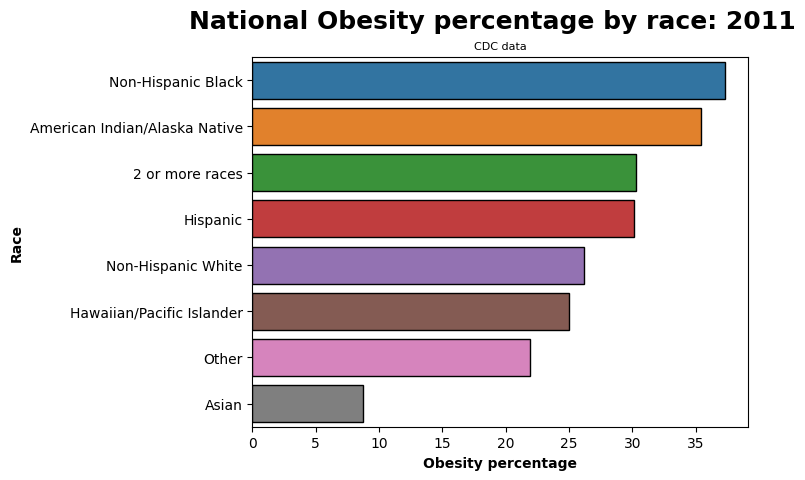

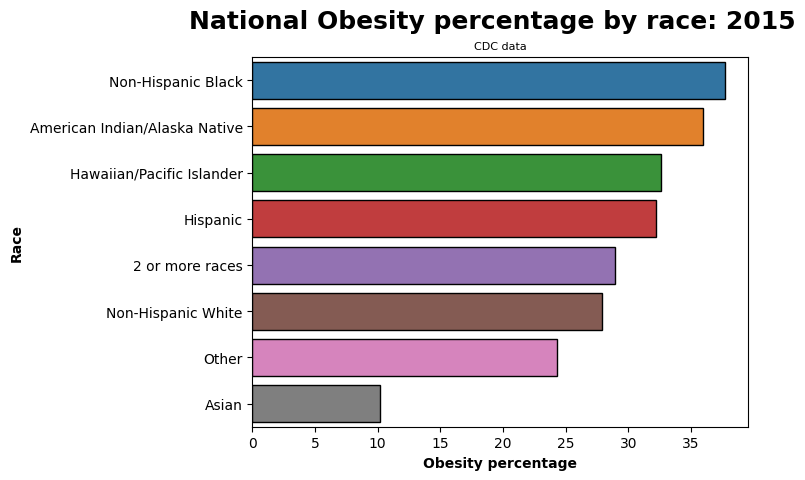

In [10]:
def plot_sql(plt_x, plt_y, plt_data, plt_suptitle, plt_xlabel, plt_ylabel):
    plt.suptitle(plt_suptitle, weight = 'bold', color = 'black').set_fontsize(18)
    plt.title('CDC data', color = 'black').set_fontsize(8)
    sns.barplot(x=plt_x, y=plt_y, data = plt_data, edgecolor = 'black')
    plt.xlabel(plt_xlabel, weight = 'bold', color = 'black').set_fontsize(10)
    plt.ylabel(plt_ylabel, weight = 'bold', color = 'black').set_fontsize(10)
    plt.xticks(color = 'black')
    plt.yticks(color = 'black')
    return plt.show()
plot_obes_nat_re_11y = plot_sql('data_value', 'race_ethnicity', national_re_11, 
                                'National Obesity percentage by race: 2011', 'Obesity percentage', 'Race')
plot_obes_nat_re_15y = plot_sql('data_value', 'race_ethnicity', national_re_15, 
                                'National Obesity percentage by race: 2015', 'Obesity percentage', 'Race')

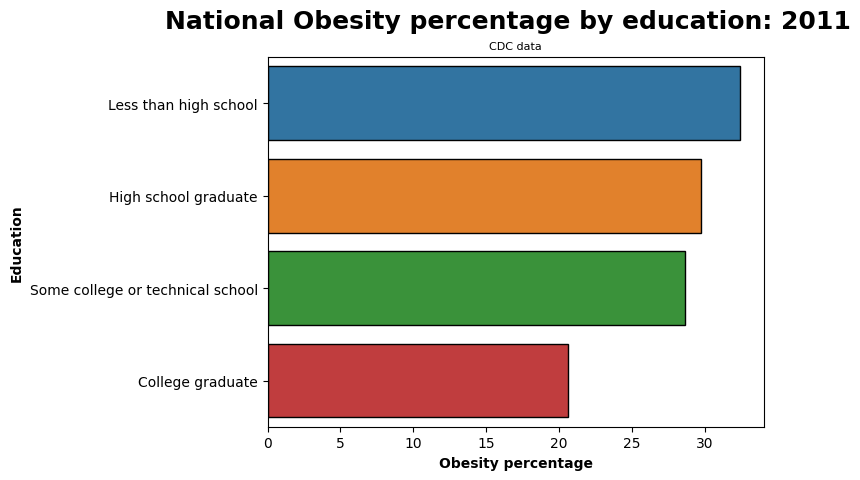

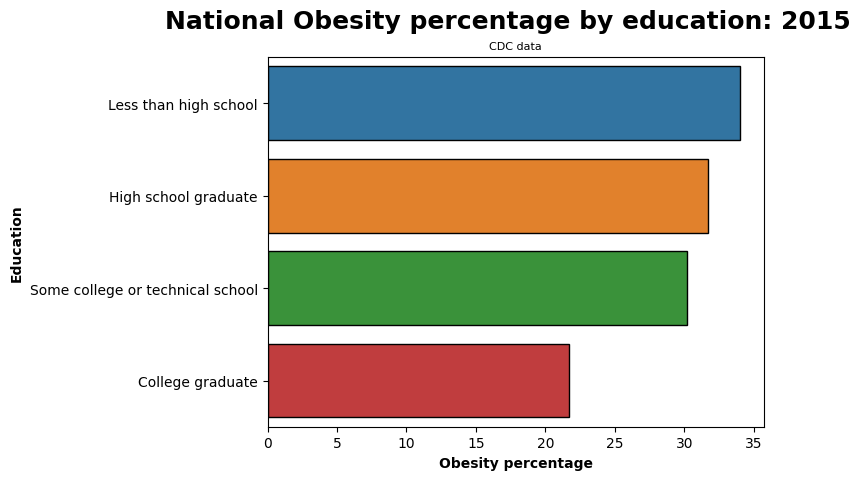

In [12]:
plot_obes_nat_edu_11y = plot_sql('data_value', 'education', national_edu_11, 
                                 'National Obesity percentage by education: 2011', 'Obesity percentage', 'Education')
plot_obes_nat_edu_15y = plot_sql('data_value', 'education', national_edu_15, 
                                 'National Obesity percentage by education: 2015', 'Obesity percentage', 'Education')

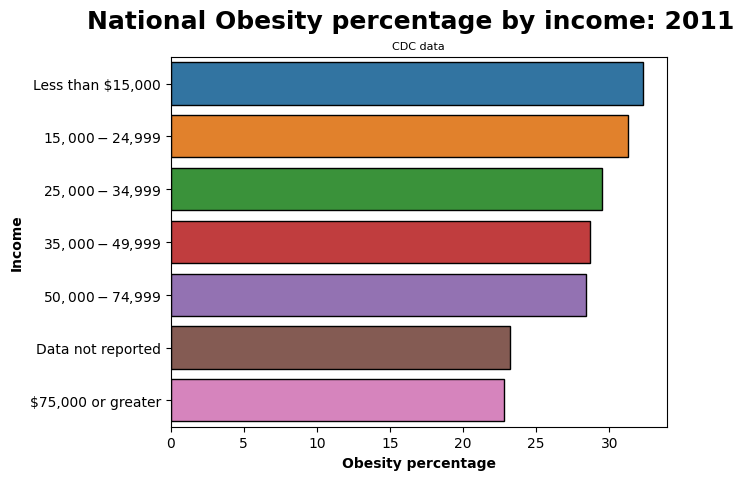

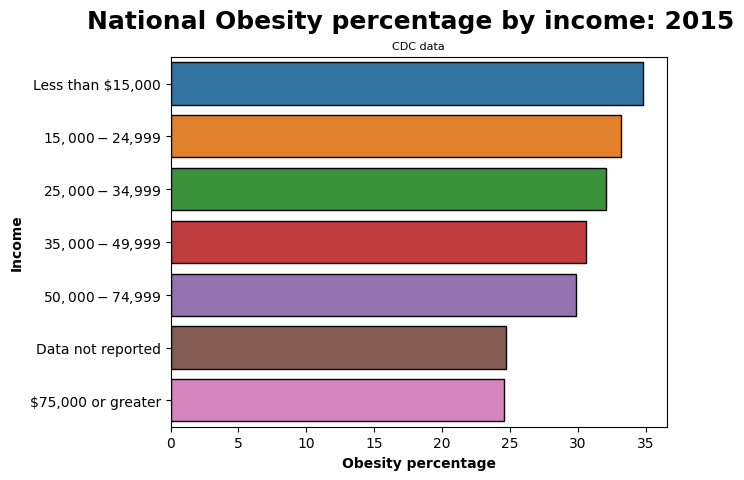

In [13]:
plot_obes_nat_inc_11y = plot_sql('data_value', 'income', national_inc_11, 
                                 'National Obesity percentage by income: 2011', 'Obesity percentage', 'Income')
plot_obes_nat_inc_15y = plot_sql('data_value', 'income', national_inc_15, 
                                 'National Obesity percentage by income: 2015', 'Obesity percentage', 'Income')

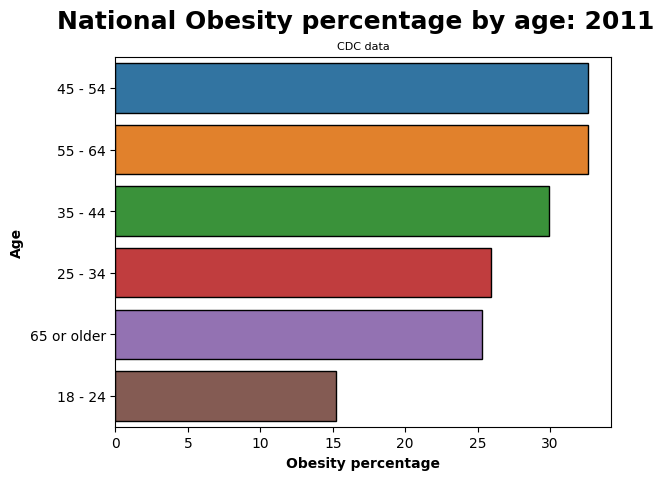

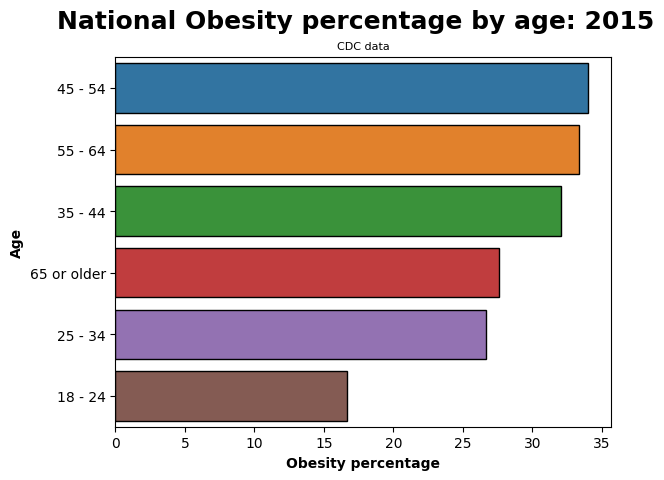

In [14]:
plot_obes_nat_age_11y = plot_sql('data_value', 'age_years', national_age_11, 
                                 'National Obesity percentage by age: 2011', 'Obesity percentage', 'Age')
plot_obes_nat_age_15y = plot_sql('data_value', 'age_years', national_age_15, 
                                 'National Obesity percentage by age: 2015', 'Obesity percentage', 'Age')

In [ ]:
colorado_re_15 = pd.read_sql('''SELECT DISTINCT sample_size, data_value, race_ethnicity
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'Colorado'
							AND yearend = 2015 AND race_ethnicity NOT NULL
							ORDER BY data_value DESC ''', con)
colorado_edu_15 = pd.read_sql('''SELECT sample_size, data_value, education
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'Colorado'
							AND education NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)
colorado_inc_15 = pd.read_sql('''SELECT sample_size, data_value, income
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'Colorado'
                            AND income NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)
colorado_age_15 = pd.read_sql('''SELECT sample_size, data_value, age_years
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'Colorado'
                            AND age_years NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)


In [ ]:
colorado_re_11 = pd.read_sql('''SELECT DISTINCT sample_size, data_value, race_ethnicity
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'Colorado'
							AND yearend = 2011 AND race_ethnicity NOT NULL
							ORDER BY data_value DESC ''', con)
colorado_edu_11 = pd.read_sql('''SELECT sample_size, data_value, education
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'Colorado'
							AND education NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)
colorado_inc_11 = pd.read_sql('''SELECT sample_size, data_value, income
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'Colorado'
                            AND income NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)
colorado_age_11 = pd.read_sql('''SELECT sample_size, data_value, age_years
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'Colorado'
                            AND age_years NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)

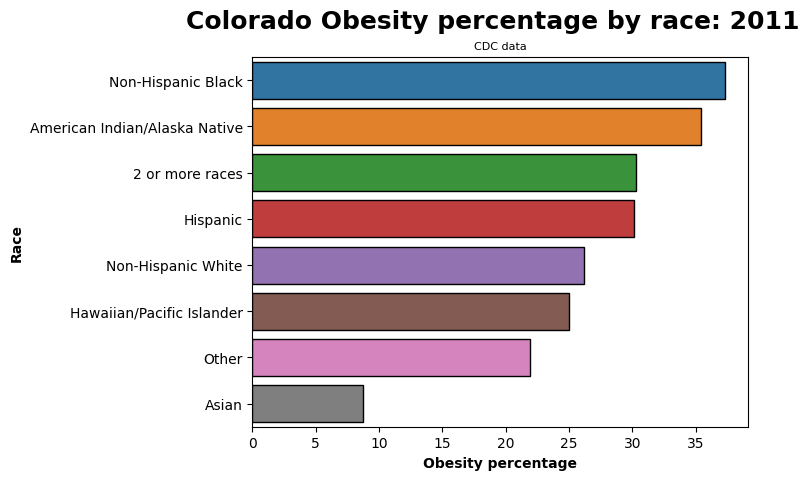

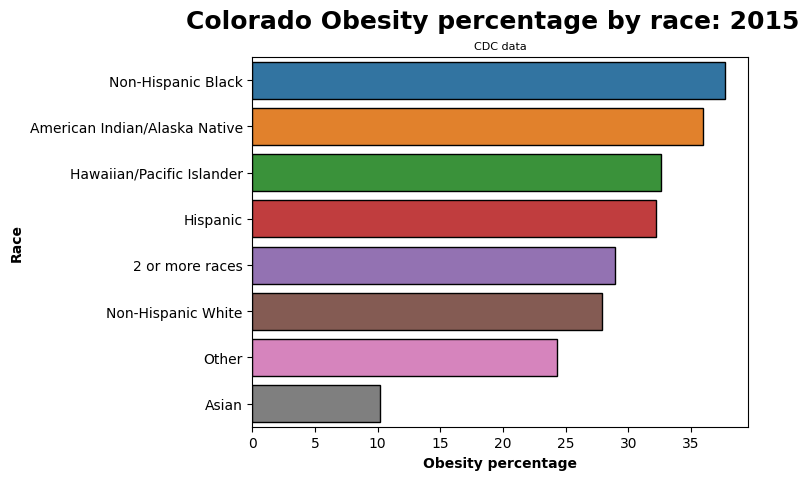

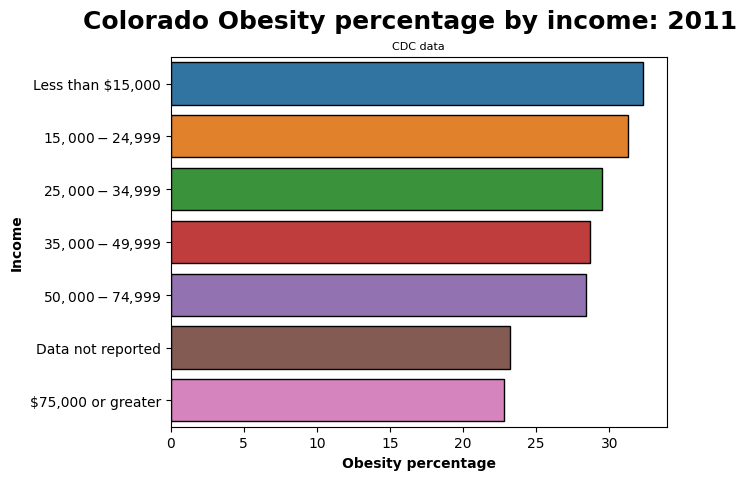

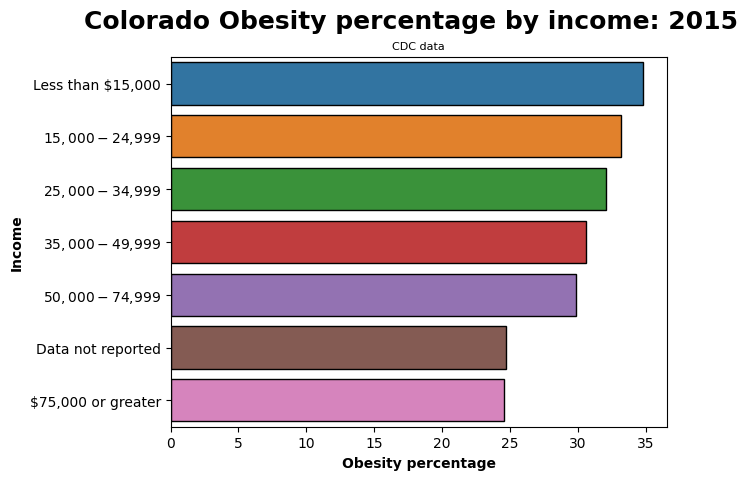

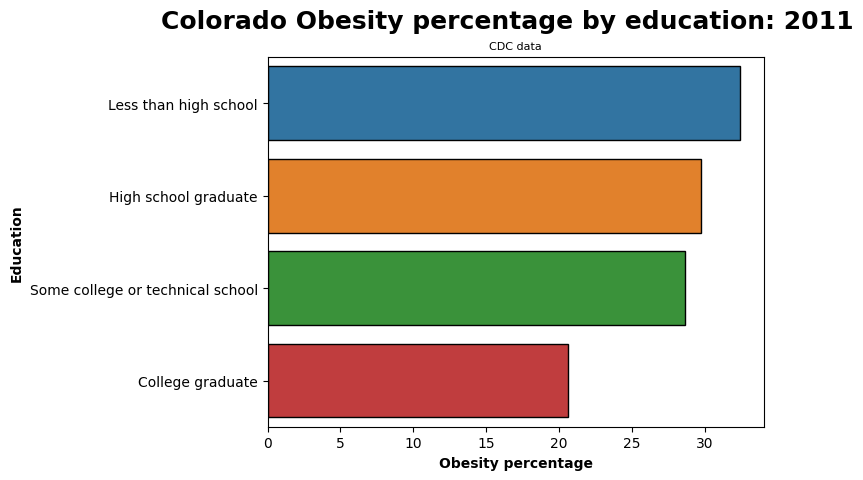

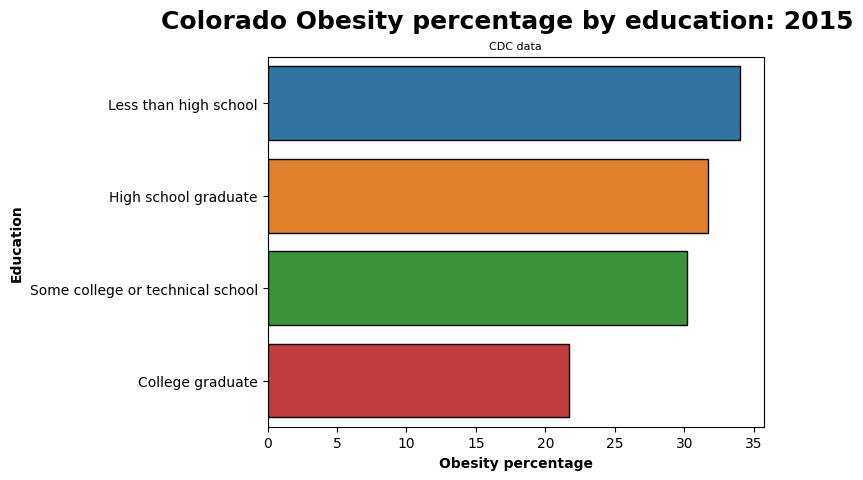

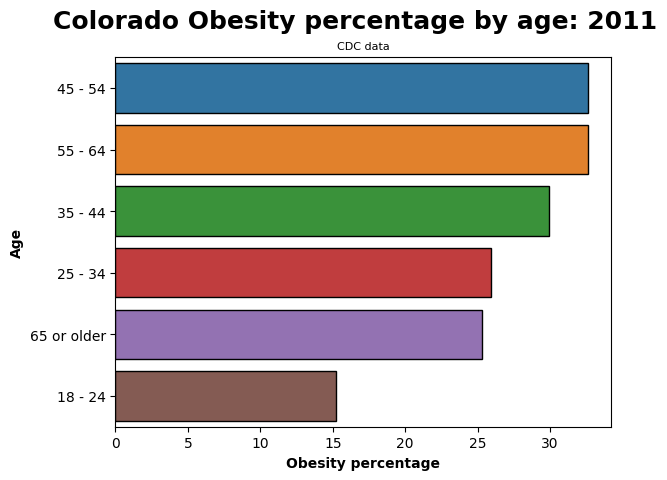

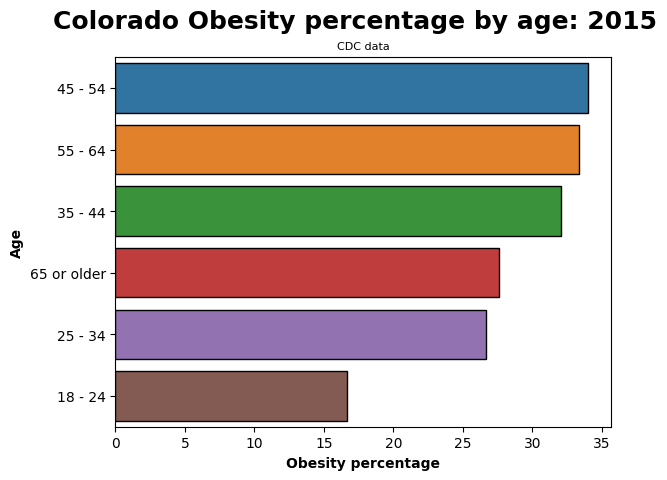

In [15]:
plot_obes_col_re_11y = plot_sql('data_value', 'race_ethnicity', colorado_re_11, 
                                'Colorado Obesity percentage by race: 2011', 'Obesity percentage', 'Race')
plot_obes_col_re_15y = plot_sql('data_value', 'race_ethnicity', colorado_re_15, 
                                'Colorado Obesity percentage by race: 2015', 'Obesity percentage', 'Race')
plot_obes_col_inc_11y = plot_sql('data_value', 'income', colorado_inc_11, 
                                 'Colorado Obesity percentage by income: 2011', 'Obesity percentage', 'Income')
plot_obes_col_inc_15y = plot_sql('data_value', 'income', colorado_inc_15, 
                                 'Colorado Obesity percentage by income: 2015', 'Obesity percentage', 'Income')
plot_obes_col_edu_11y = plot_sql('data_value', 'education', colorado_edu_11, 
                                 'Colorado Obesity percentage by education: 2011', 'Obesity percentage', 'Education')
plot_obes_col_edu_15y = plot_sql('data_value', 'education', colorado_edu_15, 
                                 'Colorado Obesity percentage by education: 2015', 'Obesity percentage', 'Education')
plot_obes_col_age_11y = plot_sql('data_value', 'age_years', colorado_age_11, 
                                 'Colorado Obesity percentage by age: 2011', 'Obesity percentage', 'Age')
plot_obes_col_age_15y = plot_sql('data_value', 'age_years', colorado_age_15, 
                                 'Colorado Obesity percentage by age: 2015', 'Obesity percentage', 'Age')

In [17]:
florida_re_15 = pd.read_sql('''SELECT DISTINCT sample_size, data_value, race_ethnicity
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'Florida'
							AND yearend = 2015 AND race_ethnicity NOT NULL
							ORDER BY data_value DESC ''', con)
florida_edu_15 = pd.read_sql('''SELECT sample_size, data_value, education
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'Florida'
							AND education NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)
florida_inc_15 = pd.read_sql('''SELECT sample_size, data_value, income
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'Florida'
                            AND income NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)
florida_age_15 = pd.read_sql('''SELECT sample_size, data_value, age_years
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'Florida'
                            AND age_years NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)

In [18]:
florida_re_11 = pd.read_sql('''SELECT DISTINCT sample_size, data_value, race_ethnicity
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'Florida'
							AND yearend = 2011 AND race_ethnicity NOT NULL
							ORDER BY data_value DESC ''', con)
florida_edu_11 = pd.read_sql('''SELECT sample_size, data_value, education
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'Florida'
							AND education NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)
florida_inc_11 = pd.read_sql('''SELECT sample_size, data_value, income
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'Florida'
                            AND income NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)
florida_age_11 = pd.read_sql('''SELECT sample_size, data_value, age_years
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'Florida'
                            AND age_years NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)

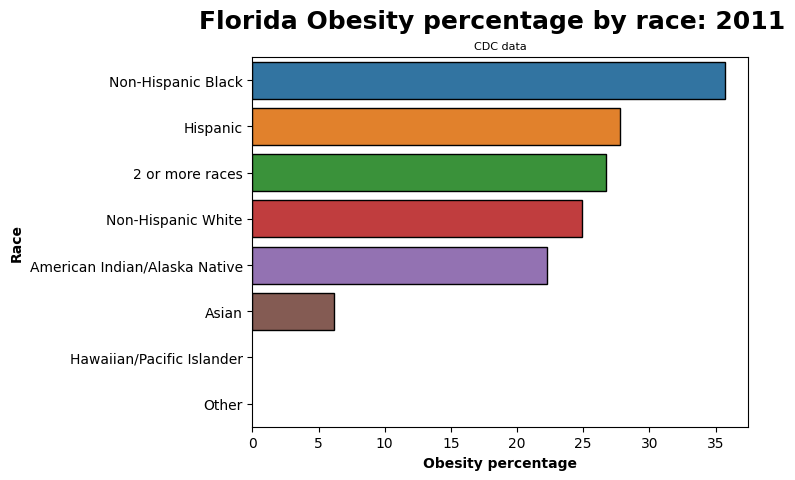

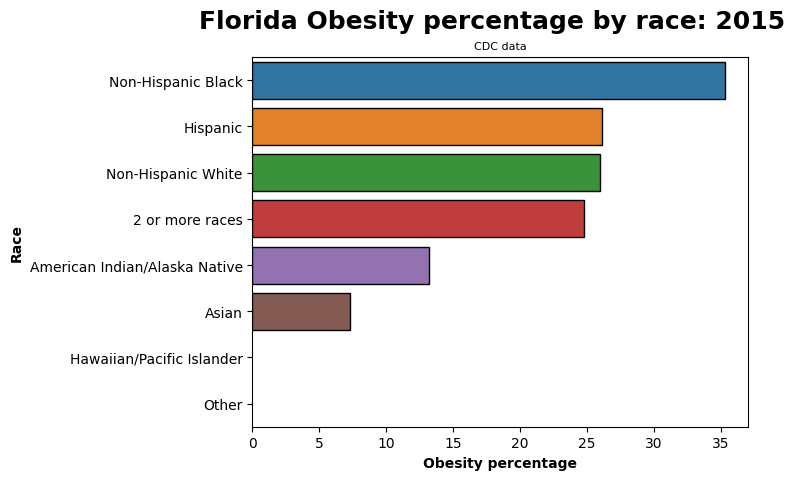

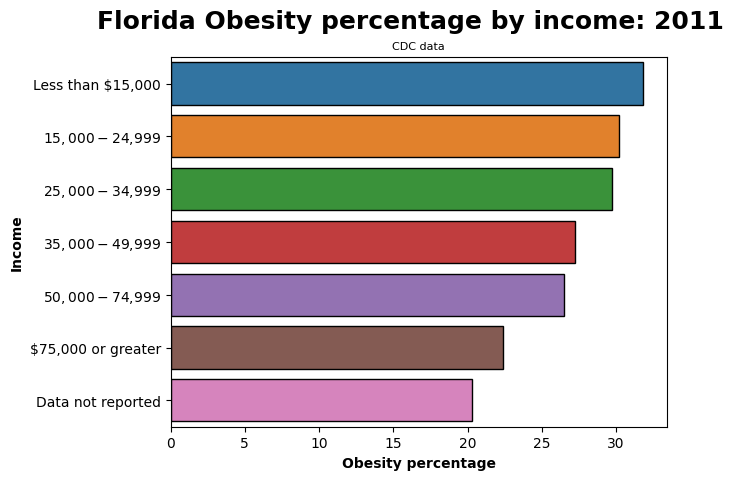

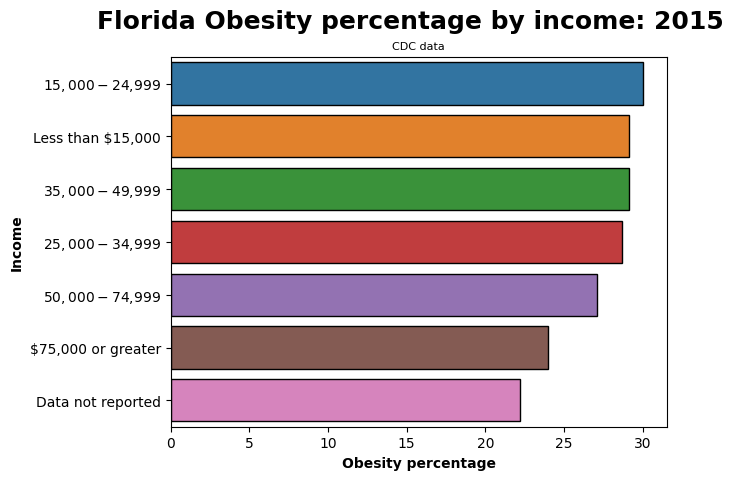

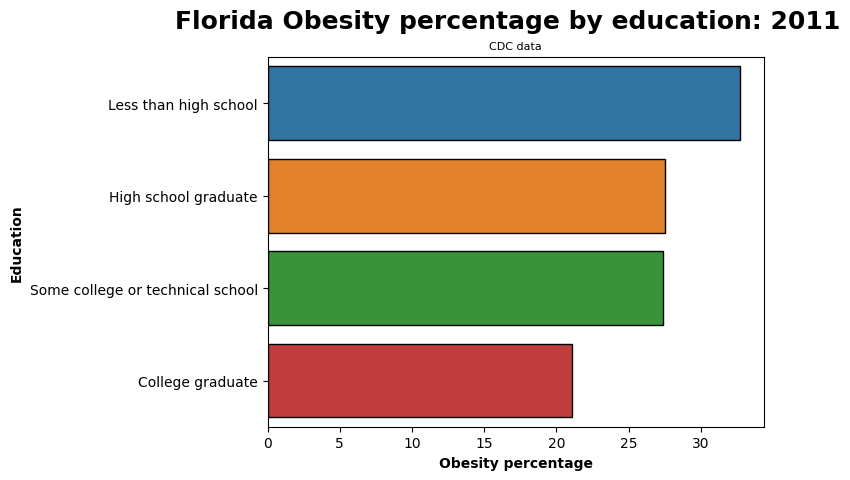

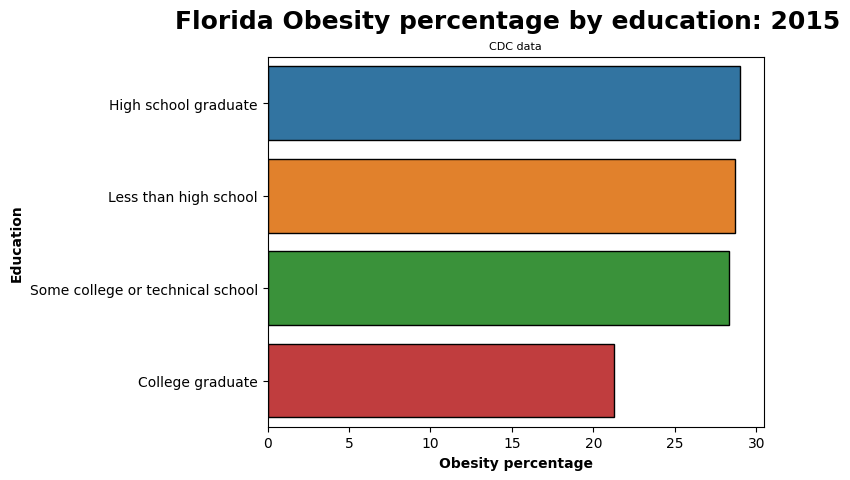

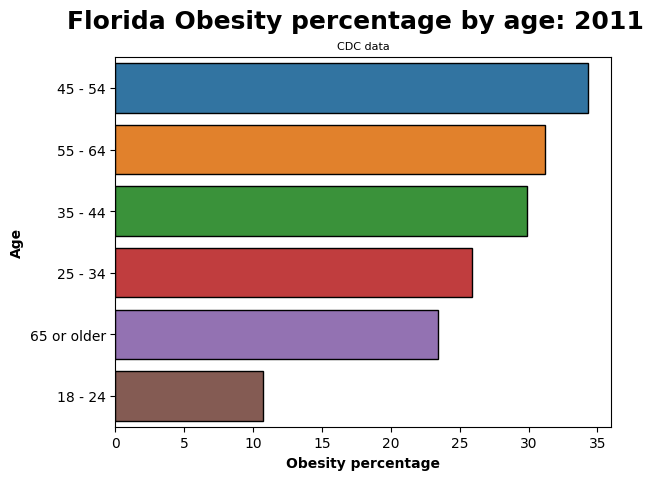

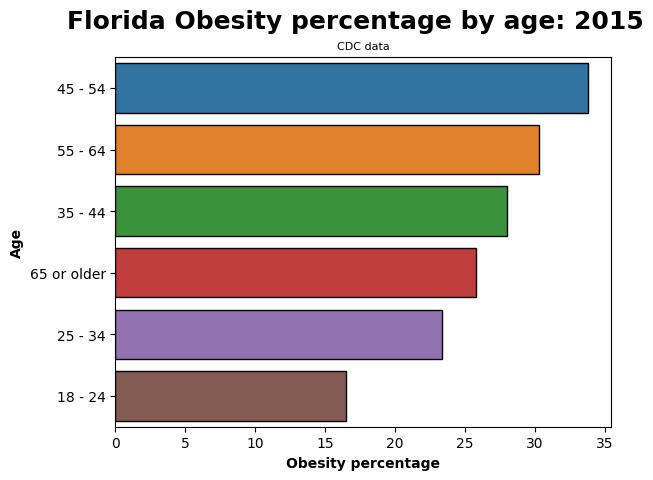

In [19]:
plot_obes_flo_re_11y = plot_sql('data_value', 'race_ethnicity', florida_re_11, 
                                'Florida Obesity percentage by race: 2011', 'Obesity percentage', 'Race')
plot_obes_flo_re_15y = plot_sql('data_value', 'race_ethnicity', florida_re_15, 
                                'Florida Obesity percentage by race: 2015', 'Obesity percentage', 'Race')
plot_obes_flo_inc_11y = plot_sql('data_value', 'income', florida_inc_11, 
                                 'Florida Obesity percentage by income: 2011', 'Obesity percentage', 'Income')
plot_obes_flo_inc_15y = plot_sql('data_value', 'income', florida_inc_15, 
                                 'Florida Obesity percentage by income: 2015', 'Obesity percentage', 'Income')
plot_obes_flo_edu_11y = plot_sql('data_value', 'education', florida_edu_11, 
                                 'Florida Obesity percentage by education: 2011', 'Obesity percentage', 'Education')
plot_obes_flo_edu_15y = plot_sql('data_value', 'education', florida_edu_15, 
                                 'Florida Obesity percentage by education: 2015', 'Obesity percentage', 'Education')
plot_obes_flo_age_11y = plot_sql('data_value', 'age_years', florida_age_11, 
                                 'Florida Obesity percentage by age: 2011', 'Obesity percentage', 'Age')
plot_obes_flo_age_15y = plot_sql('data_value', 'age_years', florida_age_15, 
                                 'Florida Obesity percentage by age: 2015', 'Obesity percentage', 'Age')

In [20]:
california_re_15 = pd.read_sql('''SELECT DISTINCT sample_size, data_value, race_ethnicity
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'California'
							AND yearend = 2015 AND race_ethnicity NOT NULL
							ORDER BY data_value DESC ''', con)
california_edu_15 = pd.read_sql('''SELECT sample_size, data_value, education
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'California'
							AND education NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)
california_inc_15 = pd.read_sql('''SELECT sample_size, data_value, income
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'California'
                            AND income NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)
california_age_15 = pd.read_sql('''SELECT sample_size, data_value, age_years
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'California'
                            AND age_years NOT NULL AND yearend = 2015
                            ORDER BY data_value DESC ''', con)

In [21]:
california_re_11 = pd.read_sql('''SELECT DISTINCT sample_size, data_value, race_ethnicity
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'California'
							AND yearend = 2011 AND race_ethnicity NOT NULL
							ORDER BY data_value DESC ''', con)
california_edu_11 = pd.read_sql('''SELECT sample_size, data_value, education
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                            AND locationdesc = 'California'
							AND education NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)
california_inc_11 = pd.read_sql('''SELECT sample_size, data_value, income
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'California'
                            AND income NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)
california_age_11 = pd.read_sql('''SELECT sample_size, data_value, age_years
							FROM sqldf
							WHERE question = 'Percent of adults aged 18 years and older who have obesity'
							AND locationdesc = 'California'
                            AND age_years NOT NULL AND yearend = 2011
                            ORDER BY data_value DESC ''', con)

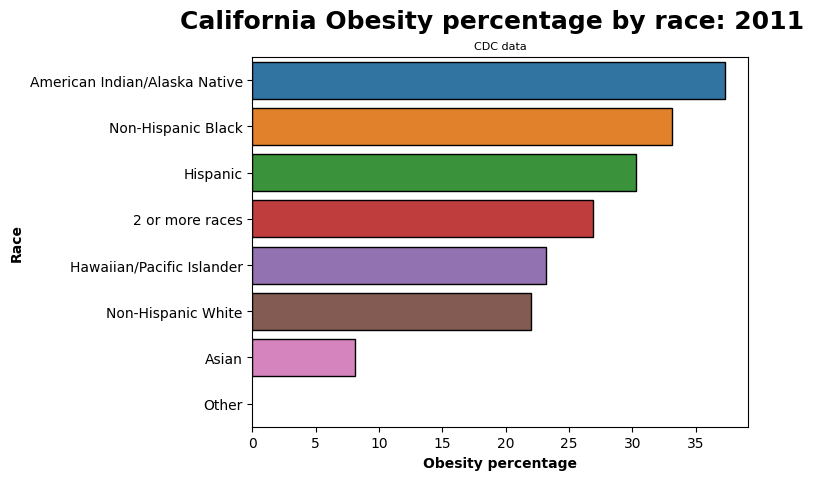

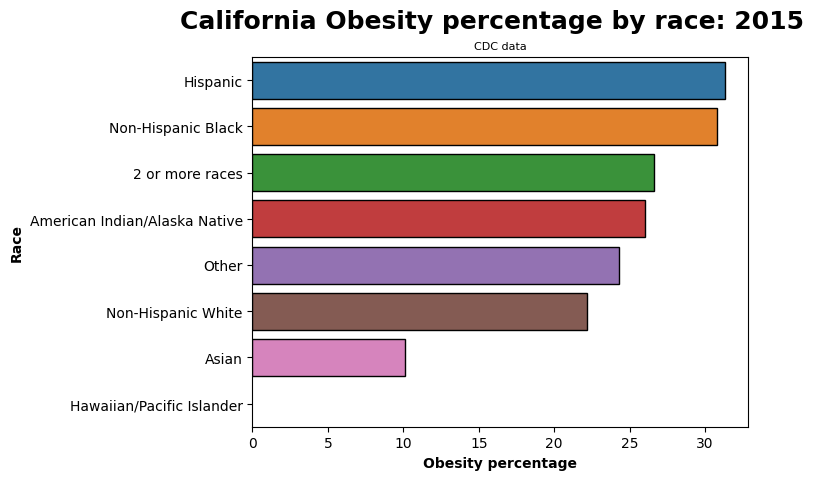

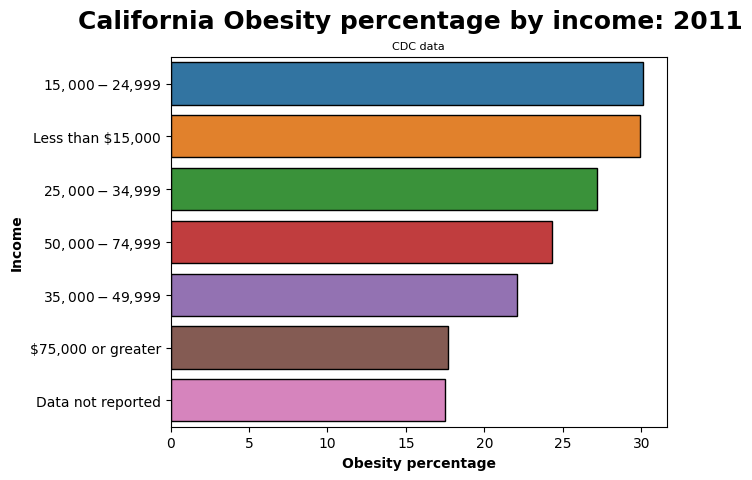

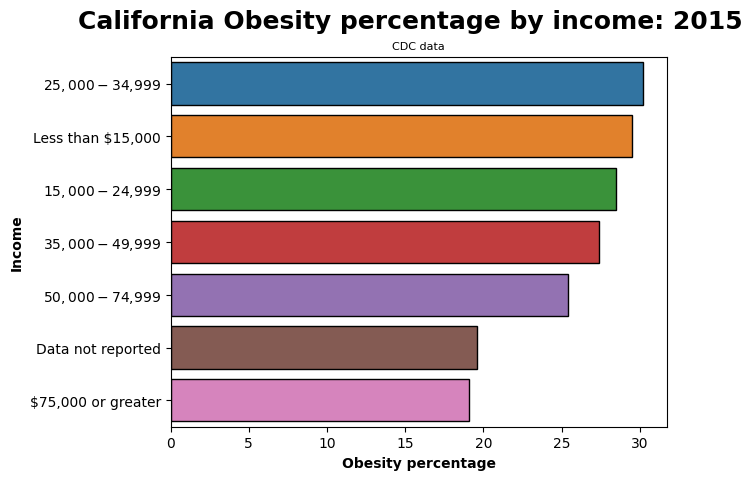

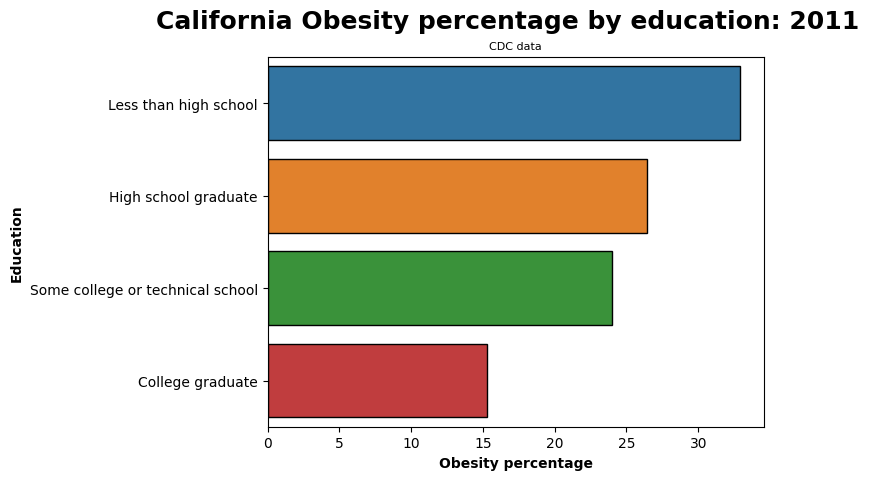

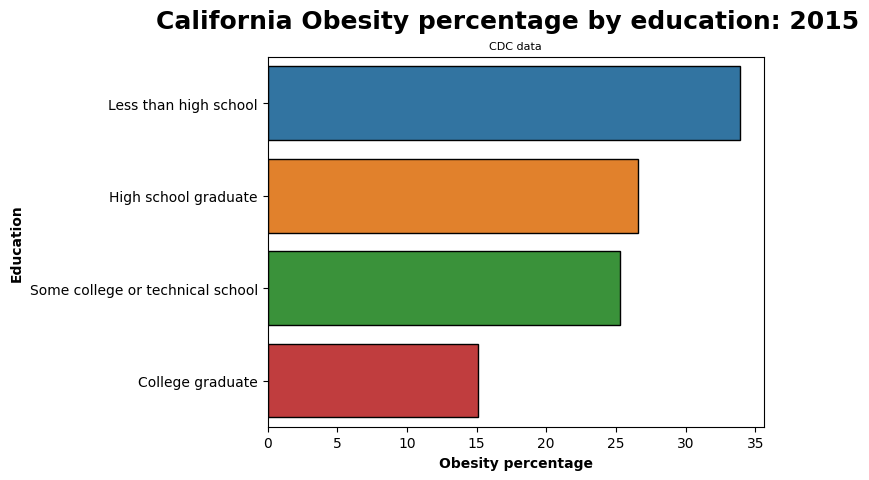

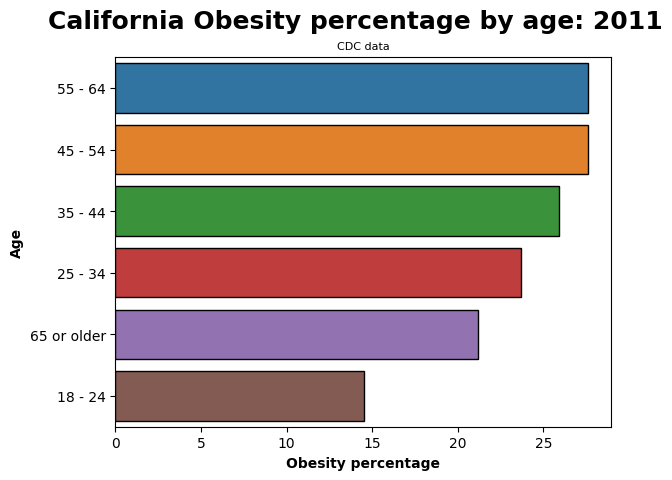

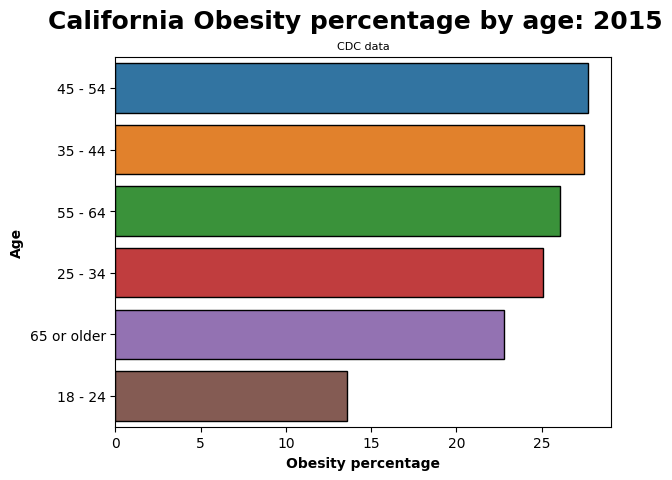

In [22]:
plot_obes_cal_re_11y = plot_sql('data_value', 'race_ethnicity', california_re_11, 
                                'California Obesity percentage by race: 2011', 'Obesity percentage', 'Race')
plot_obes_cal_re_15y = plot_sql('data_value', 'race_ethnicity', california_re_15, 
                                'California Obesity percentage by race: 2015', 'Obesity percentage', 'Race')
plot_obes_cal_inc_11y = plot_sql('data_value', 'income', california_inc_11, 
                                 'California Obesity percentage by income: 2011', 'Obesity percentage', 'Income')
plot_obes_cal_inc_15y = plot_sql('data_value', 'income', california_inc_15, 
                                 'California Obesity percentage by income: 2015', 'Obesity percentage', 'Income')
plot_obes_cal_edu_11y = plot_sql('data_value', 'education', california_edu_11, 
                                 'California Obesity percentage by education: 2011', 'Obesity percentage', 'Education')
plot_obes_cal_edu_15y = plot_sql('data_value', 'education', california_edu_15, 
                                 'California Obesity percentage by education: 2015', 'Obesity percentage', 'Education')
plot_obes_cal_age_11y = plot_sql('data_value', 'age_years', california_age_11, 
                                 'California Obesity percentage by age: 2011', 'Obesity percentage', 'Age')
plot_obes_cal_age_15y = plot_sql('data_value', 'age_years', california_age_15, 
                                 'California Obesity percentage by age: 2015', 'Obesity percentage', 'Age')

In [31]:
sql_ages_states_11 = pd.read_sql('''SELECT data_value, locationdesc, age_years
                                    FROM sqldf
                                    WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                                    AND yearend = 2011
                                    AND age_years NOT NULL
                                    ORDER BY locationdesc''', con)
print(sql_ages_states_11)

     data_value locationdesc    age_years
0          16.3      Alabama      18 - 24
1          35.2      Alabama      25 - 34
2          35.5      Alabama      35 - 44
3          38.0      Alabama      45 - 54
4          36.4      Alabama      55 - 64
..          ...          ...          ...
307        25.1      Wyoming      25 - 34
308        28.7      Wyoming      35 - 44
309        29.3      Wyoming      45 - 54
310        31.8      Wyoming      55 - 64
311        20.4      Wyoming  65 or older

[312 rows x 3 columns]


In [42]:
sql_ages_states_11_avg = pd.read_sql('''SELECT DISTINCT AVG(data_value) over(partition by locationdesc) AS avg_value,
                                    locationdesc
                                    FROM sqldf
                                    WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                                    AND yearend = 2011
                                    AND age_years NOT NULL
                                    ORDER BY avg_value DESC
                                    LIMIT 10''', con)
print(sql_ages_states_11_avg)

   avg_value    locationdesc
0  34.616667     Mississippi
1  32.933333       Louisiana
2  31.700000   West Virginia
3  31.416667         Alabama
4  30.916667        Oklahoma
5  30.766667        Arkansas
6  30.683333        Michigan
7  30.466667         Indiana
8  30.183333  South Carolina
9  29.983333        Kentucky


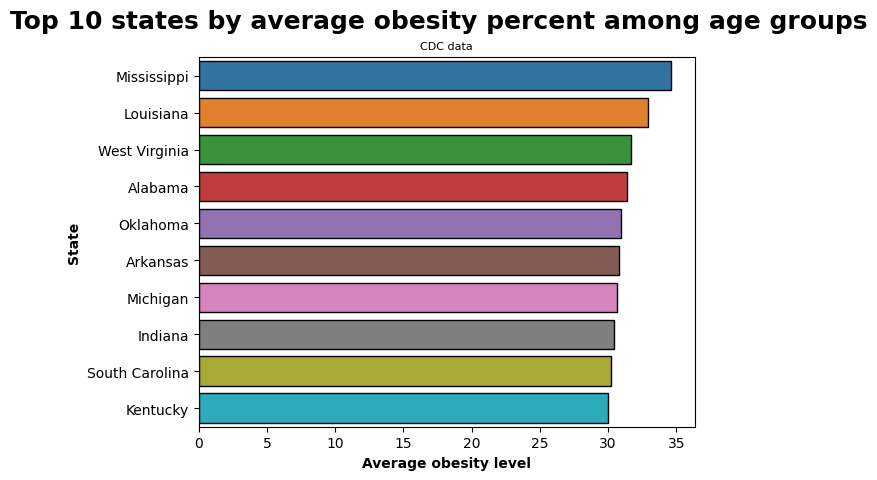

In [46]:
plt.suptitle('Top 10 states by average obesity percent among age groups 2011'
             , weight = 'bold', color = 'black').set_fontsize(18)
plt.title('CDC data', color = 'black').set_fontsize(8)
sns.barplot(x='avg_value', y='locationdesc', data = sql_ages_states_11_avg, edgecolor = 'black')
plt.xlabel('Average obesity level', weight = 'bold', color = 'black').set_fontsize(10)
plt.ylabel('State', weight = 'bold', color = 'black').set_fontsize(10)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.show()

In [55]:
sql_ages_states_15_avg = pd.read_sql('''SELECT DISTINCT AVG(data_value) over(partition by locationdesc) AS avg_value,
                                    locationdesc
                                    FROM sqldf
                                    WHERE question = 'Percent of adults aged 18 years and older who have obesity'
                                    AND yearend = 2015
                                    AND age_years NOT NULL
                                    ORDER BY avg_value DESC
                                    LIMIT 10''', con)
print(sql_ages_states_15_avg)

   avg_value   locationdesc
0  36.116667      Louisiana
1  35.716667    Mississippi
2  35.416667        Alabama
3  35.116667  West Virginia
4  34.183333       Arkansas
5  34.050000         Kansas
6  33.933333       Kentucky
7  33.683333       Oklahoma
8  33.316667      Tennessee
9  32.083333          Texas


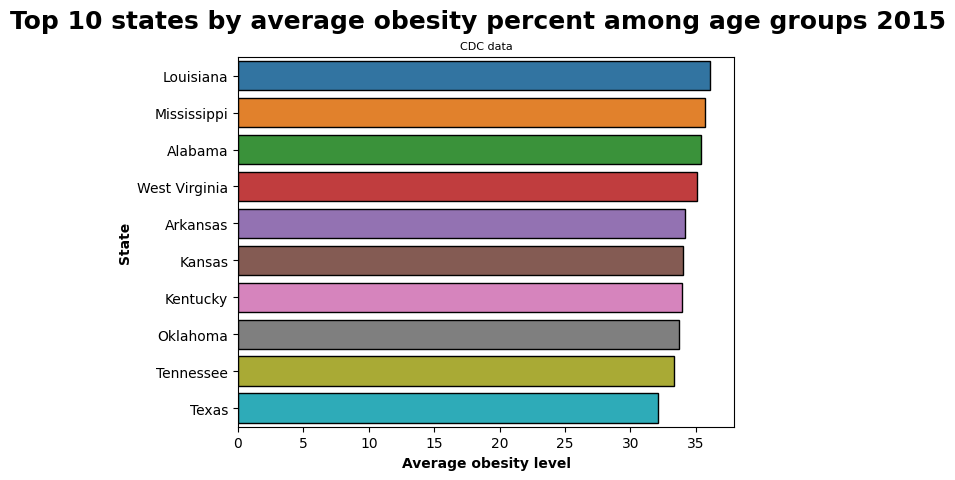

In [56]:
plt.suptitle('Top 10 states by average obesity percent among age groups 2015'
             , weight = 'bold', color = 'black').set_fontsize(18)
plt.title('CDC data', color = 'black').set_fontsize(8)
sns.barplot(x='avg_value', y='locationdesc', data = sql_ages_states_15_avg, edgecolor = 'black')
plt.xlabel('Average obesity level', weight = 'bold', color = 'black').set_fontsize(10)
plt.ylabel('State', weight = 'bold', color = 'black').set_fontsize(10)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.show()

In [58]:
sql_ages_states_11_ovrwght = pd.read_sql('''SELECT DISTINCT AVG(data_value) over(partition by locationdesc) AS avg_value,
                                    locationdesc
                                    FROM sqldf
                                    WHERE question = 'Percent of adults aged 18 years and older who have an overweight classification'
                                    AND yearend = 2011
                                    AND age_years NOT NULL
                                    ORDER BY avg_value DESC
                                    LIMIT 10''', con)
print(sql_ages_states_11_ovrwght)

   avg_value  locationdesc
0  38.783333        Alaska
1  37.400000       Arizona
2  36.983333    New Jersey
3  36.933333     Tennessee
4  36.533333  Rhode Island
5  36.466667      Illinois
6  36.433333         Maine
7  36.316667       Florida
8  36.216667     Minnesota
9  36.066667      Nebraska


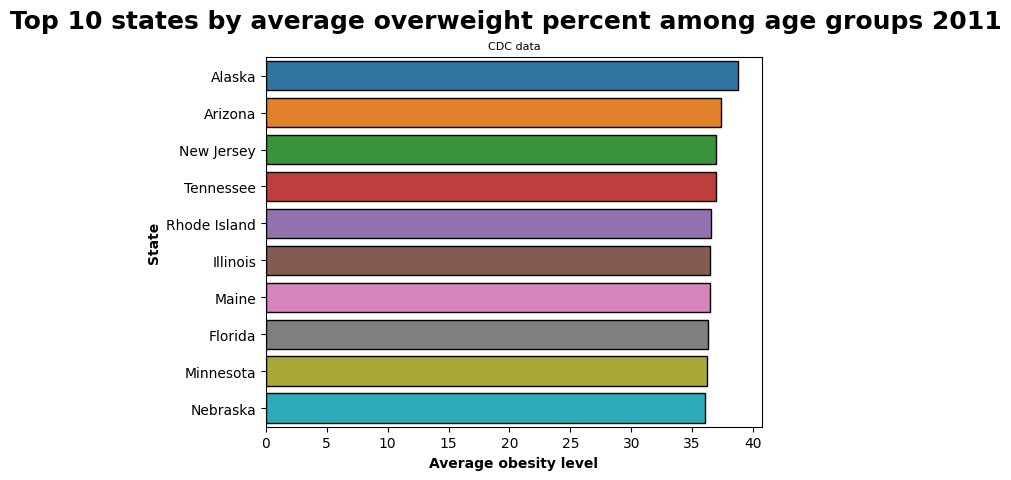

In [59]:
plt.suptitle('Top 10 states by average overweight percent among age groups 2011'
             , weight = 'bold', color = 'black').set_fontsize(18)
plt.title('CDC data', color = 'black').set_fontsize(8)
sns.barplot(x='avg_value', y='locationdesc', data = sql_ages_states_11_ovrwght, edgecolor = 'black')
plt.xlabel('Average obesity level', weight = 'bold', color = 'black').set_fontsize(10)
plt.ylabel('State', weight = 'bold', color = 'black').set_fontsize(10)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.show()

In [60]:
sql_ages_states_15_ovrwght = pd.read_sql('''SELECT DISTINCT AVG(data_value) over(partition by locationdesc) AS avg_value,
                                    locationdesc
                                    FROM sqldf
                                    WHERE question = 'Percent of adults aged 18 years and older who have an overweight classification'
                                    AND yearend = 2015
                                    AND age_years NOT NULL
                                    ORDER BY avg_value DESC
                                    LIMIT 10''', con)
print(sql_ages_states_15_ovrwght)

   avg_value   locationdesc
0  37.133333     New Jersey
1  37.083333         Nevada
2  37.066667         Alaska
3  36.750000        Montana
4  36.683333        Arizona
5  36.516667    Puerto Rico
6  36.483333       Delaware
7  36.433333        Florida
8  36.366667  New Hampshire
9  36.166667          Idaho


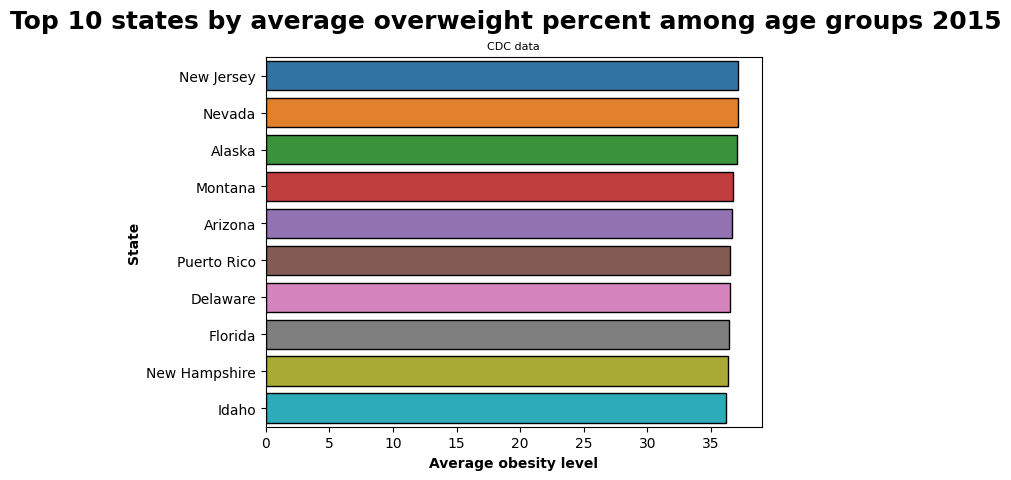

In [61]:
plt.suptitle('Top 10 states by average overweight percent among age groups 2015'
             , weight = 'bold', color = 'black').set_fontsize(18)
plt.title('CDC data', color = 'black').set_fontsize(8)
sns.barplot(x='avg_value', y='locationdesc', data = sql_ages_states_15_ovrwght, edgecolor = 'black')
plt.xlabel('Average obesity level', weight = 'bold', color = 'black').set_fontsize(10)
plt.ylabel('State', weight = 'bold', color = 'black').set_fontsize(10)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.show()